In [1]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.default_inference import DefaultInference
import pandas as pd

In [2]:
# Load pre-processed data
SG_CRC_GE = pd.read_csv("SingaporeCRC_data/SG_CRC_GE.csv", index_col=0,delimiter=",")
SG_CRC_GE

C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_19176\3742741416.py:2: DtypeWarning: Columns (39667) have mixed types. Specify dtype option on import or set low_memory=False.
  SG_CRC_GE = pd.read_csv("SingaporeCRC_data/SG_CRC_GE.csv", index_col=0,delimiter=",")


,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,Age.at.Diagnosis,Site.of.Primary.Colorectal.tumour,Side,Grade,TNM,Stage,iCMS,CMS,group3,group5
patient_id1,,,,,,,,,,,,,,,,,,,,,
1504.0,21.899490,0.201798,24.813475,2.385601,2.423479,1.719561,4.938426,17.340649,17.525062,8.360323,...,70.0,Rectum,Left,2,T2N1(3/21)M1,IV,iCMS2,CMS4,iCMS2_MSS,iCMS2_fibrotic
1603.0,23.051914,0.336181,32.488898,3.491298,4.838602,1.709233,5.097042,23.091196,25.009775,16.164803,...,66.0,Rectosigmoid junction,Left,2,T3N0(0/19)M0,IIA,iCMS2,CMS2,iCMS2_MSS,iCMS2_MSS
1324.0,17.759606,0.321224,73.592613,3.189865,4.491900,0.835416,2.342624,26.887325,30.539995,13.148909,...,73.0,Sigmoid colon,Left,2,T3N1c(0/17)M0,IIIB,iCMS2,CMS2,iCMS2_MSS,iCMS2_MSS
834.0,10.718835,0.092844,22.659393,2.741735,3.737818,0.692069,1.440818,10.085834,14.951673,7.726470,...,71.0,Rectosigmoid junction,Left,2,T3N0(0/27)M0,IIA,iCMS2,CMS2,iCMS2_MSS,iCMS2_MSS
1662.0,27.208802,0.745929,14.048898,5.442878,1.954963,2.571285,7.385909,15.042006,14.375950,6.126601,...,67.0,Rectum,Left,2,T3N1a(1/36)M0,IIIB,iCMS3,CMS3,iCMS3_MSS,iCMS3_MSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607.0,23.451535,0.108787,17.911861,3.298083,4.157520,0.483072,1.646369,19.915323,25.855965,7.355974,...,67.0,Ascending colon,Right,2,T3N1b(2/32)M0,IIIB,iCMS3,CMS3,iCMS3_MSS,iCMS3_MSS
1448.0,22.468734,0.633003,23.361645,4.886279,5.240244,0.450576,1.690369,15.562312,19.087965,9.101713,...,68.0,Rectum,Left,2,T3N2(4/17)M0,IIIB,iCMS2,CMS2,iCMS2_MSS,iCMS2_MSS
891.0,5.567352,0.110154,10.611309,7.648380,4.337681,5.249050,6.239189,15.364255,18.859650,6.947568,...,73.0,Splenic flexure,Left,2,T3N1(1/19)M0,IIA,iCMS3,CMS4,iCMS3_MSS,iCMS3_fibrotic


In [3]:
from sklearn.preprocessing import StandardScaler
# Prepare features and target variable
X = SG_CRC_GE.drop(['TMB', 'KRAS_y', 'BRAF_y', 'NRAS_y', 'TP53_y',
       'APC_y', 'PIK3CA_y', 'PIK3R1_y', 'SMAD4_y', 'ERBB4_y', 'RNF43_y',
       'ZNRF3_y', 'KIT_y', 'TGFBR2_y', 'Vital.status', 'MSI.Status', 'CRIS',
       'Gender', 'Age.at.Diagnosis', 'Site.of.Primary.Colorectal.tumour',
       'Side', 'Grade', 'TNM', 'Stage', 'iCMS', 'CMS', 'group3', 'group5','Vital.status'], axis=1)


In [4]:
metadata = pd.DataFrame(zip(SG_CRC_GE.index,SG_CRC_GE['Gender']), columns = ['Sample_ID','Condition'])
metadata = metadata.set_index('Sample_ID')
metadata


,Condition
Sample_ID,
1504.0,Female
1603.0,Male
1324.0,Male
834.0,Male
1662.0,Male
...,...
1607.0,Female
1448.0,Female
891.0,Male


In [5]:
X_scaled = X.astype('int')

inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(counts=X_scaled,
             metadata=metadata,
             design_factors="Condition",
             refit_cooks=True,
             inference=inference,
             )
dds

c:\Anaconda\Lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 113 × 39645
    obs: 'Condition'
    obsm: 'design_matrix'

In [6]:
# Compute normalization factors
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

dds.fit_size_factors()

dds.obsm["size_factors"]

# %%
# Fit genewise dispersions
# ^^^^^^^^^^^^^^^^^^^^^^^^

dds.fit_genewise_dispersions()

dds.varm["genewise_dispersions"]

# %%
# Fit dispersion trend coefficients
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

dds.fit_dispersion_trend()
dds.uns["trend_coeffs"]
dds.varm["fitted_dispersions"]

# %%
# Dispersion priors
# ^^^^^^^^^^^^^^^^^

dds.fit_dispersion_prior()
print(
    f"logres_prior={dds.uns['_squared_logres']}, sigma_prior={dds.uns['prior_disp_var']}"
)

Fitting size factors...
... done in 0.23 seconds.

Fitting dispersions...
... done in 1.66 seconds.

Fitting dispersion trend curve...


logres_prior=2.076154295589127, sigma_prior=2.057972978225905


... done in 0.36 seconds.



In [7]:
dds.fit_MAP_dispersions()
dds.varm["MAP_dispersions"]
dds.varm["dispersions"]
dds.fit_LFC()
dds.varm["LFC"]
dds.calculate_cooks()
if dds.refit_cooks:
    # Replace outlier counts
    dds.refit()

Fitting MAP dispersions...
... done in 2.78 seconds.

Fitting LFCs...
... done in 1.54 seconds.

Replacing 511 outlier genes.

Fitting dispersions...
... done in 0.16 seconds.

Fitting MAP dispersions...
... done in 0.17 seconds.

Fitting LFCs...
... done in 0.16 seconds.



In [8]:
stat_res = DeseqStats(dds, alpha=0.05, cooks_filter=True, independent_filter=True)
stat_res.run_wald_test()
stat_res.p_values

Running Wald tests...
... done in 1.39 seconds.



TSPAN6       0.249265
TNMD         0.923513
DPM1         0.925675
SCYL3        0.603729
FIRRM        0.955385
               ...   
LINC02725         NaN
OR13I1P           NaN
OR8S21P           NaN
OR6R2P       0.328373
APP-DT       0.916137
Length: 39645, dtype: float64

In [9]:
if stat_res.cooks_filter:
    stat_res._cooks_filtering()
stat_res.p_values

TSPAN6       0.249265
TNMD         0.923513
DPM1         0.925675
SCYL3        0.603729
FIRRM        0.955385
               ...   
LINC02725         NaN
OR13I1P           NaN
OR8S21P           NaN
OR6R2P       0.328373
APP-DT       0.916137
Length: 39645, dtype: float64

In [10]:
# P-value adjustment
# ^^^^^^^^^^^^^^^^^^

if stat_res.independent_filter:
    stat_res._independent_filtering()
else:
    stat_res._p_value_adjustment()

stat_res.padj

TSPAN6       0.999998
TNMD              NaN
DPM1         0.999998
SCYL3        0.999998
FIRRM        0.999998
               ...   
LINC02725         NaN
OR13I1P           NaN
OR8S21P           NaN
OR6R2P       0.999998
APP-DT       0.999998
Name: 10, Length: 39645, dtype: float64

In [11]:
stat_res.summary()

Log2 fold change & Wald test p-value: Condition Male vs Female
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
TSPAN6     16.258546       -0.161028  0.139765 -1.152137  0.249265  0.999998
TNMD        0.082757        0.147757  1.538986  0.096009  0.923513       NaN
DPM1       21.279414        0.011943  0.128018  0.093288  0.925675  0.999998
SCYL3       3.532771        0.077073  0.148489  0.519046  0.603729  0.999998
FIRRM       3.463990        0.008472  0.151429  0.055946  0.955385  0.999998
...              ...             ...       ...       ...       ...       ...
LINC02725   0.000000             NaN       NaN       NaN       NaN       NaN
OR13I1P     0.000000             NaN       NaN       NaN       NaN       NaN
OR8S21P     0.000000             NaN       NaN       NaN       NaN       NaN
OR6R2P      1.157633       -0.249071  0.254831 -0.977397  0.328373  0.999998
APP-DT      0.931698        0.029885  0.283807  0.105301  0.916137  0.999998

[39645 rows 

In [12]:
stat_res.lfc_shrink(coeff="Condition_Male_vs_Female")

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: Condition Male vs Female
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
TSPAN6     16.258546   -8.611543e-06  0.001524 -1.152137  0.249265  0.999998
TNMD        0.082757    2.829325e-07  0.001768  0.096009  0.923513       NaN
DPM1       21.279414    7.638036e-07  0.001567  0.093288  0.925675  0.999998
SCYL3       3.532771    3.434210e-06  0.001560  0.519046  0.603729  0.999998
FIRRM       3.463990    3.867569e-07  0.001558  0.055946  0.955385  0.999998
...              ...             ...       ...       ...       ...       ...
LINC02725   0.000000             NaN       NaN       NaN       NaN       NaN
OR13I1P     0.000000             NaN       NaN       NaN       NaN       NaN
OR8S21P     0.000000             NaN       NaN       NaN       NaN       NaN
OR6R2P      1.157633   -3.152886e-06  0.001554 -0.977397  0.328373  0.999998
APP-DT      0.931698    3.038296e-07  0.001559  0.105301  0.916137  0.999998

[3964

... done in 4.37 seconds.



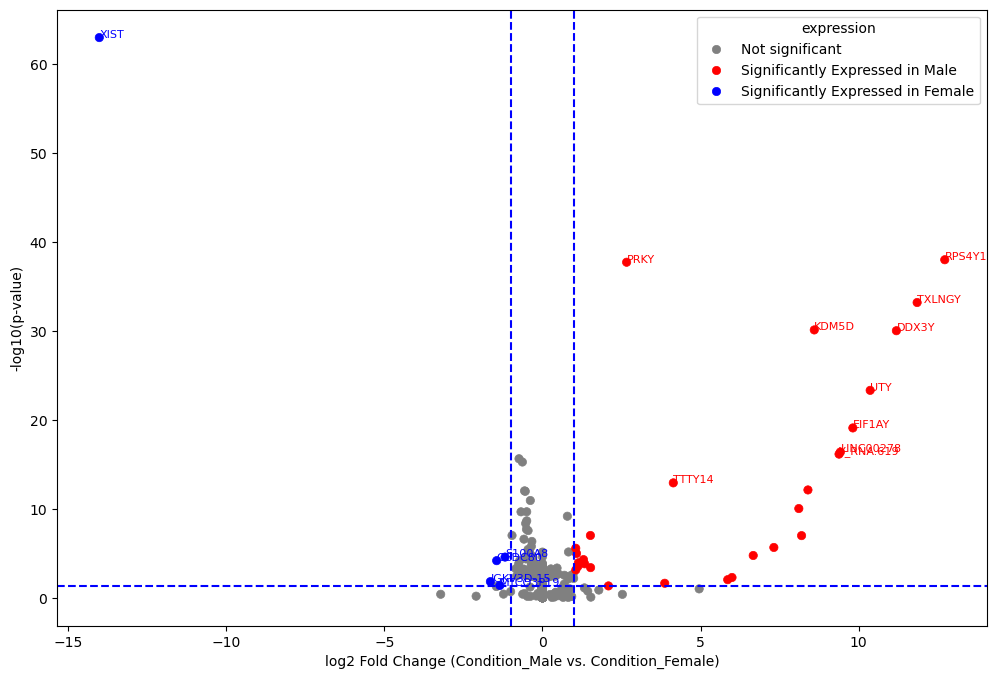

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'stat_res' is your result object from pydeseq2
# Convert the DeseqStats object to a DataFrame
results_df = stat_res.results_df

# Extract the relevant columns
log2fc = results_df["log2FoldChange"]
pvals = results_df["pvalue"]

# Compute -log10(p-value)
neg_log10_pvals = -np.log10(pvals)

# Create a DataFrame for easier handling
df = pd.DataFrame({
    "gene": X.columns,
    "log2FoldChange": log2fc,
    "-log10(pvalue)": neg_log10_pvals,
    "pvalue": pvals
})

# Define significance thresholds
pval_threshold = 0.05
log2fc_threshold = 1

# Add a column for increased or decreased abundance
df["expression"] = np.where((df["pvalue"] < pval_threshold) & (df["log2FoldChange"] > log2fc_threshold), 'Significantly Expressed in Male',
                           np.where((df["pvalue"] < pval_threshold) & (df["log2FoldChange"] < -log2fc_threshold), 'Significantly Expressed in Female', 'Not significant'))

# Filter the DataFrame to get lists of top 20 microbes
top_10_in_male = df[df["expression"] == "Significantly Expressed in Male"].nlargest(10, "-log10(pvalue)")
top_10_in_female = df[df["expression"] == "Significantly Expressed in Female"].nlargest(10, "-log10(pvalue)")

# Plot using matplotlib
plt.figure(figsize=(12, 8))

# Custom color palette
palette = {'Significantly Expressed in Male': 'red', 'Significantly Expressed in Female': 'blue', 'Not significant': 'grey'}

sns.scatterplot(data=df, x="log2FoldChange", y="-log10(pvalue)", hue="expression", palette=palette, edgecolor=None)
plt.xlabel('log2 Fold Change (Condition_Male vs. Condition_Female)')
plt.ylabel('-log10(p-value)')
plt.axhline(y=-np.log10(pval_threshold), color='blue', linestyle='--')  # p-value threshold line
plt.axvline(x=log2fc_threshold, color='blue', linestyle='--')  # log2FC threshold lines
plt.axvline(x=-log2fc_threshold, color='blue', linestyle='--')

# Label the top 10 points in each category
for i in range(top_10_in_male.shape[0]):
    plt.text(top_10_in_male["log2FoldChange"].iloc[i], top_10_in_male["-log10(pvalue)"].iloc[i], 
             top_10_in_male["gene"].iloc[i], fontsize=8, color='red')

for i in range(top_10_in_female.shape[0]):
    plt.text(top_10_in_female["log2FoldChange"].iloc[i], top_10_in_female["-log10(pvalue)"].iloc[i], 
             top_10_in_female["gene"].iloc[i], fontsize=8, color='blue')

plt.show()


In [19]:
# Print the lists of top 10 genes in MSS
print("Top 10 Genes Expressed in Male:")
for i, gene in enumerate(top_10_in_male["gene"], 1):
    print(f"{i}. {gene}")

Top 10 Genes Expressed in Male:
1. RPS4Y1
2. PRKY
3. TXLNGY
4. KDM5D
5. DDX3Y
6. UTY
7. EIF1AY
8. LINC00278
9. Y_RNA.619
10. TTTY14


In [20]:
# Print the lists of top 10 genes in MSI
print("Top 10 Genes Expressed in Female:")
for i, gene in enumerate(top_10_in_female["gene"], 1):
    print(f"{i}. {gene}")

Top 10 Genes Expressed in Female:
1. XIST
2. S100A8
3. CCDC80
4. IGKV3D-15
5. MTCO3P19
